In this Notebook, We're going to study curing patients in four sections using a dataset that we've created.

# Section1: Create a synthetic data set using choice function

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style('white')

In [2]:
def num_random_generator(a):
    np.random.seed(0)
    return np.random.choice(a, size=100)

Age = num_random_generator(np.arange(20, 61))
Sex = num_random_generator([0, 1])
Height = num_random_generator(np.arange(150, 201))
Weight = num_random_generator(np.arange(50, 131))
Smoker = num_random_generator([0, 1])
Patient = num_random_generator([0, 1])

df = pd.DataFrame({"Age": Age,
                  "Sex": Sex, # Male -> 0 , Femle -> 1
                  "Height": Height,
                  "Weight" : Weight,
                  "Smoker" : Smoker,
                  "Cure" : Patient})
df

,Age,Sex,Height,Weight,Smoker,Cure
0,20,0,194,94,0,0
1,23,1,197,97,1,1
2,23,1,150,114,1,1
3,59,0,153,117,0,0
4,29,1,153,117,1,1
...,...,...,...,...,...,...
95,54,0,185,53,0,0
96,49,0,173,92,0,0
97,23,1,165,127,1,1
98,54,1,163,71,1,1


# Section2 : Visulizations

In [3]:
df.describe()

,Age,Sex,Height,Weight,Smoker,Cure
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,39.160000,0.560000,172.530000,91.230000,0.560000,0.560000
std,12.890933,0.498888,14.813627,23.993204,0.498888,0.498888
min,20.000000,0.000000,150.000000,50.000000,0.000000,0.000000
25%,28.750000,0.000000,161.000000,70.750000,0.000000,0.000000
50%,38.500000,1.000000,170.500000,91.500000,1.000000,1.000000
75%,51.250000,1.000000,186.000000,114.000000,1.000000,1.000000
max,60.000000,1.000000,200.000000,130.000000,1.000000,1.000000


<IPython.core.display.Javascript object>


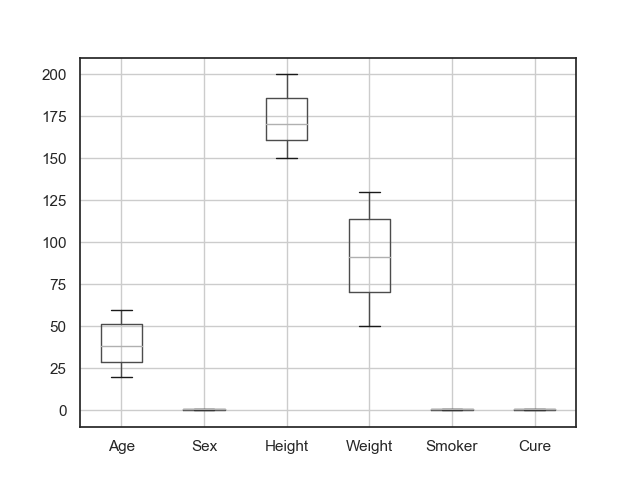

<AxesSubplot: >

In [4]:
df.boxplot()

<IPython.core.display.Javascript object>


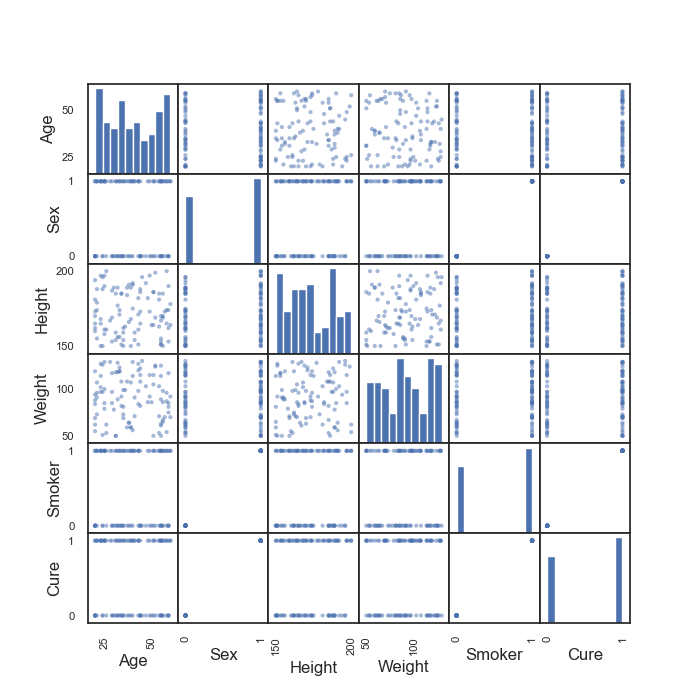

In [5]:
_ = pd.plotting.scatter_matrix(df, figsize=(7, 7), range_padding=0.2)

# Section3: Create a predictive model using the Ordinary Least Squares 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = df.iloc[: , :-1], df.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80, test_size=20, random_state=0)


linreg = LinearRegression().fit(X_train, y_train)
print("Least-squares Linear Regression")
print("Model Coeff :\n{}".format(linreg.coef_))
print("Model Intercept : {:.3f}"
     .format(linreg.intercept_))
print("R-Squared score (Training): {:.3f}"
      .format(linreg.score(X_train, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(linreg.score(X_test, y_test)))
print("Model Inference:\n", linreg.predict(X_test))

Least-squares Linear Regression
Model Coeff :
[ 1.11560716e-17  5.00000000e-01 -5.55111512e-17 -1.11022302e-16
  5.00000000e-01]
Model Intercept : 0.000
R-Squared score (Training): 1.000
R-Squared score (Test): 1.000
Model Inference:
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.94477474e-15
  1.00000000e+00  6.11699491e-16 -3.12851375e-15  4.34237190e-15
  1.00000000e+00  3.32247428e-15  1.00000000e+00  7.79848185e-16
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00 -3.05095966e-15  4.43188968e-15  1.00000000e+00]


Or we can predict the target values instead of using .predict() on the model by multiplying each column of the input with the appropriate weight, summing the results, and adding the intercept to the sum.

In [7]:
y_predicted = np.sum(linreg.coef_ * X_test, axis= 1) + linreg.intercept_
y_predicted

26    1.000000e+00
86    1.000000e+00
2     1.000000e+00
55    1.944775e-15
75    1.000000e+00
93    6.116995e-16
16   -3.128514e-15
73    4.342372e-15
54    1.000000e+00
95    3.322474e-15
53    1.000000e+00
92    7.798482e-16
78    1.000000e+00
13    1.000000e+00
7     1.000000e+00
30    1.000000e+00
22    1.000000e+00
24   -3.050960e-15
33    4.431890e-15
8     1.000000e+00
dtype: float64

# Section 4: What are The most important features in the curing of patients?

<IPython.core.display.Javascript object>


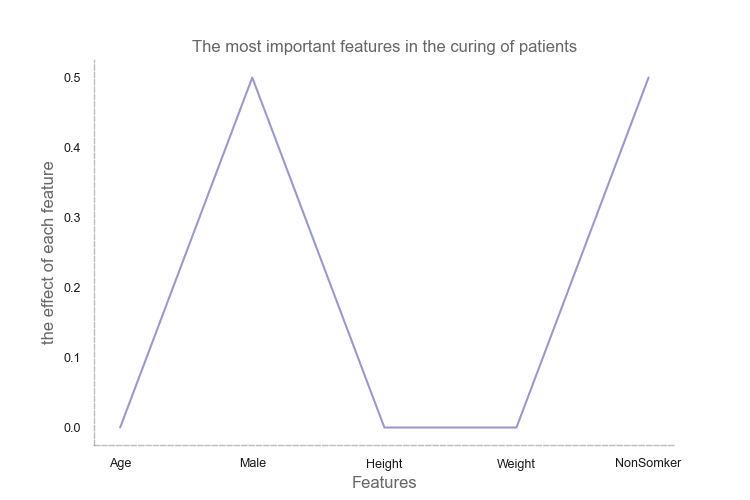

In [8]:
labels = ['Age', 'Male', 'Height', 'Weight', 'NonSomker']
data = linreg.coef_

# Create a figure and axis
plt.figure(figsize=(7.5,5))
plt.tight_layout()
ax = plt.gca()

ax.set_title("The most important features in the curing of patients", alpha=.7)
ax.set_ylabel('the effect of each feature', alpha=.7)
ax.set_xlabel('Features', alpha=.7)

ax.tick_params(axis='both', which='both', labelsize=9, labelcolor='k')

for key, value in ax.spines.items():
    if key == 'bottom' or key == 'left':
        value.set_alpha(.3)
        value.set_linestyle('--')
        value.set_linewidth(1)
    else:
        value.set_visible(False)

# change x tick labels
x_loc = range(5)
ax.set_xticks(ticks=x_loc, labels=x_loc)
for i in range(5):
    ax.set_xticklabels(labels)

# plot a horizontal barchart
_ = plt.plot(data, '-', color='Navy', alpha=.4)

As you can see, we have a strong relationship between the features male and nonsmoker, and the patients who were cured. So the most important features in the curing of patients are Sex and Smoker. 
